In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import os

%matplotlib inline

In [2]:
# Loading  data
df = pd.read_csv('UCI_Credit_Card_balanced.csv')

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
scaler = StandardScaler()

In [5]:
scaler.fit(df.drop('Y',axis=1))

StandardScaler()

In [6]:
scaled_features = scaler.fit_transform(df.drop('Y',axis=1))

In [7]:
X = pd.DataFrame(scaled_features,columns=df.columns[:-1]).values
y = df['Y'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, cohen_kappa_score, plot_roc_curve, accuracy_score, roc_auc_score, precision_recall_curve, confusion_matrix, roc_curve, auc
import shap

In [10]:
logmodel = LogisticRegression(C=1, penalty='l2')

In [11]:
t0 = datetime.now()
logmodel.fit(X_train,y_train)
t1 = datetime.now()
print("Training Time: ", (t1 - t0))

Training Time:  0:00:00.196367


In [12]:
predictions = logmodel.predict(X_test)

<Figure size 504x360 with 0 Axes>

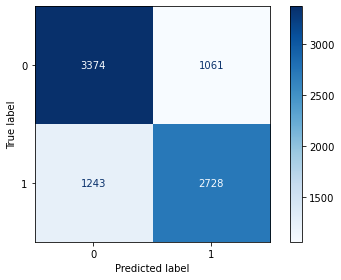

In [13]:
plt.figure(figsize=(7, 5))
ax = plot_confusion_matrix(logmodel,X_test,y_test,cmap=plt.cm.Blues)

plt.tight_layout()
plt.savefig(r'C:\Users\alanw\OneDrive\Varsity\Research\Paper Itself\LaTeX\images\logit_conf.png')
plt.show()


<Figure size 504x360 with 0 Axes>

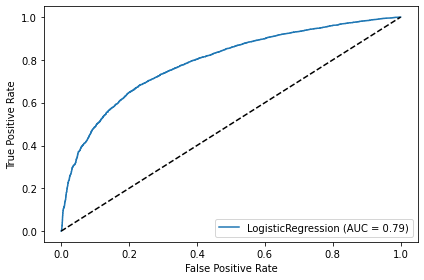

In [14]:
plt.figure(figsize=(7, 5))
ax = plot_roc_curve(logmodel,X_test,y_test)
x = np.linspace(0, 1, 100)
ax = plt.plot(x, x, linestyle='--',color='black')

plt.tight_layout()
plt.savefig(r'C:\Users\alanw\OneDrive\Varsity\Research\Paper Itself\LaTeX\images\logit_roc.png')
plt.show()

In [15]:
kappa = cohen_kappa_score(y_test, predictions)
print("Cohen's Kappa: %.2f" % (kappa))

Cohen's Kappa: 0.45


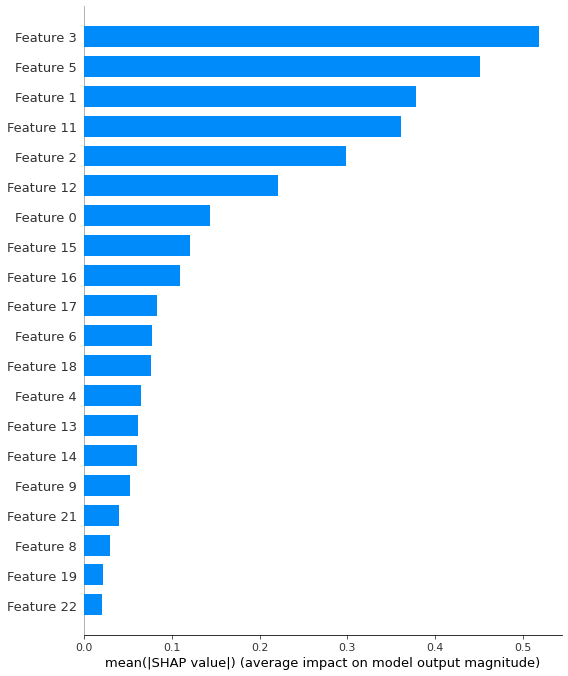

In [16]:
plt.figure(figsize=(7, 5))
shap_values = shap.LinearExplainer(logmodel,X_train).shap_values(X_train)
ax = shap.summary_plot(shap_values, X_train, plot_type="bar",show=False)

plt.tight_layout()
plt.savefig(r'C:\Users\alanw\OneDrive\Varsity\Research\Paper Itself\LaTeX\images\logit_shap.png')
plt.show()

In [17]:
# Save Model
import pickle

Pkl_Filename = "Logit_Final.pkl"  
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(logmodel, file)

In [18]:
y_scores = logmodel.predict_proba(X_test)[:, 1]

In [19]:
p, r, thresholds = precision_recall_curve(y_test, y_scores)

In [20]:
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(p, r, thresholds, t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, t)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    
    # plot the curve
    plt.figure(figsize=(8,8))
    plt.title("Precision and Recall curve ^ = current threshold")
    plt.step(r, p, color='b', alpha=0.2,
             where='post')
    plt.fill_between(r, p, step='post', alpha=0.2,
                     color='b')
    plt.ylim([0.5, 1.01]);
    plt.xlim([0.5, 1.01]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    
    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(r[close_default_clf], p[close_default_clf], '^', c='k',
            markersize=15)

     pred_neg  pred_pos
neg      3642       793
pos      1522      2449


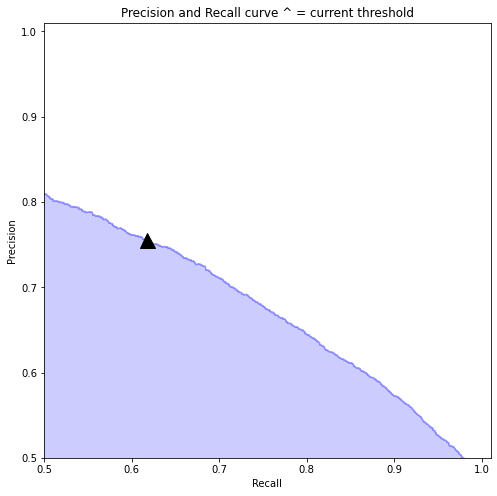

In [21]:
precision_recall_threshold(p, r, thresholds, 0.55)

In [22]:

def plot_roc_curve(fpr, tpr, label=None):
    """
    The ROC curve, modified from 
    Hands-On Machine learning with Scikit-Learn and TensorFlow; p.91
    """
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')

In [23]:
fpr, tpr, auc_thresholds = roc_curve(y_test, y_scores)
print(auc(fpr, tpr)) # AUC of ROC
plot_roc_curve(logmodel, fpr, tpr, 'recall_optimized')

0.7906178020638355


TypeError: plot_roc_curve() takes from 2 to 3 positional arguments but 4 were given